# Aprendizaje Estadístico y Data Mining

## Práctica 1: Reglas de Asociación

### Objetivo
Usa  la  librería  *mlxtend*  que  nos  permita  solucionar  todos  los problemas  relacionados  con  las  reglas  de asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta 
información  que  este  genera.  Usaremos  la  librería  con  el  Dataset **Supermercado.csv**  que  se  ha  proporcionado. Prueba al menos tres configuraciones de soporte y da respuesta a las siguientes preguntas. Estas deben estar sustentadas con datos obtenidos durante la práctica y razonadas debidamente. 

> Nota: También se pueden usar otras librerías como Orange3-Associate o Efficient-A priori.

* [Link al dataset.](./data/Supermercado.csv)

**Enunciado:** Con un soporte mínimo bajo explica que itemsets frecuentes se generan. Interpreta al menos dos de las reglas
que se obtienen con dicho soporte.

**Solución**



In [76]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np

In [77]:
CSV_FILE_PATH = "./resources/Supermercado.csv"


def cargar_datos() -> pd.DataFrame:
    """Carga los datos del archivo CSV_FILE_PATH

    Returns:
        pd.DataFrame: DataFrame con los datos del archivo CSV_FILE_PATH
    """

    # 1. Leemos el archivo CSV y lo cargamos en un DataFrame
    df = pd.read_csv(CSV_FILE_PATH, header=None)

    # 2. Convertimos cada fila en una lista de productos
    df[0] = df[0].str.split(", ")

    # 3. Eliminamos la primera fila, que contiene "Ticket"
    df = df.iloc[1:].reset_index(drop=True)

    # 4. Devolvemos el DataFrame
    return df[0]

df_original = cargar_datos()

# Transformamos al formato booleano utilizando mlxtend
# 1. Instanciamos la clase TransactionEncoder
transaction_encoder = TransactionEncoder()

# 2. Aplicamos el método fit a df_original
te_ary = transaction_encoder.fit(df_original).transform(df_original)

# 3. Creamos un nuevo DataFrame a partir de te_ary
df = pd.DataFrame(te_ary, columns=transaction_encoder.columns_)

# 4. Mostramos los primeros registros del nuevo DataFrame
print(df.head())

   Aceite de oliva   Agua  Arroz  Azúcar   Café  Carne  Cebollas  Chocolate  \
0            False  False  False   False  False  False     False      False   
1            False  False  False    True  False  False     False      False   
2            False  False   True   False   True  False      True      False   
3            False  False  False   False  False  False     False      False   
4             True  False  False   False  False   True     False      False   

   Galletas  Harina  ...  Pasta  Patatas  Pescado  Plátanos  Queso    Sal  \
0     False    True  ...  False    False    False     False  False  False   
1     False   False  ...  False     True    False     False  False  False   
2     False   False  ...  False    False    False     False  False  False   
3     False   False  ...   True    False    False      True  False  False   
4      True   False  ...  False     True    False     False  False  False   

   Tomates     Té  Yogur  Zanahorias  
0    False   True  Fals

**Enunciado:** Qué tipo reglas desaparecen según aumentamos el valor de los soportes usados? ¿Por qué?

**Solución**

#### Itemsets frecuentes generados con un Soporte mínimo muy bajo (0.05)

Con un umbral mínimo que recoge aquellos itemsets que estén en al menos el 5% de las transacciones, generamos los tipos de itemsets frecuentes: 

In [78]:
min_support = 0.05

# Generamos todos los itemsets frecuentes, eliminando aquellos que no cumplen con el soporte mínimo
itemsets_frecuentes = apriori(df, min_support, use_colnames=True)

# Asignamos longitud (k) a cada itemset frecuente en una columna extra.
itemsets_frecuentes['length'] = itemsets_frecuentes['itemsets'].apply(lambda x: len(x))

##### 1-Itemsets-Frecuentes
Observando la tabla, los Items individuales más frecuentes son la Leche (45%), las Galletas (21%) y el Té (15%). Son items bastante comunes en todas las cestas de la compra de las familias de España.
Por otro lado, nos sorprende que productos como el Chocolate (7%), los Tomates(7%) o la Carne(8.6%) sean tan poco frecuentes.

In [79]:
print(itemsets_frecuentes[itemsets_frecuentes['length'] == 1])

     support           itemsets  length
0   0.114286  (Aceite de oliva)       1
1   0.085714            (Arroz)       1
2   0.142857           (Azúcar)       1
3   0.142857             (Café)       1
4   0.085714            (Carne)       1
5   0.128571         (Cebollas)       1
6   0.071429        (Chocolate)       1
7   0.214286         (Galletas)       1
8   0.100000           (Harina)       1
9   0.085714           (Huevos)       1
10  0.114286            (Jabón)       1
11  0.457143            (Leche)       1
12  0.085714          (Lechuga)       1
13  0.085714         (Manzanas)       1
14  0.085714              (Pan)       1
15  0.057143            (Pasta)       1
16  0.100000          (Patatas)       1
17  0.100000          (Pescado)       1
18  0.128571         (Plátanos)       1
19  0.100000            (Queso)       1
20  0.071429          (Tomates)       1
21  0.157143               (Té)       1
22  0.142857            (Yogur)       1
23  0.128571       (Zanahorias)       1


##### 2-Itemsets-frecuentes
En cuanto a los itemsets con 2 individuos, únicamente podemos generar 10 de ellos. La mayoría de estos itemsets tienen como componente la Leche, ya que según 'Leche Pascual', cada español consume 70 litros de leche al año aproximadamente. 

In [80]:
print(itemsets_frecuentes[itemsets_frecuentes['length'] == 2])

     support                  itemsets  length
24  0.057143  (Aceite de oliva, Leche)       2
25  0.057143         (Arroz, Cebollas)       2
26  0.057143            (Arroz, Leche)       2
27  0.057143           (Azúcar, Leche)       2
28  0.071429             (Café, Leche)       2
29  0.071429         (Cebollas, Leche)       2
30  0.100000         (Leche, Galletas)       2
31  0.071429         (Plátanos, Leche)       2
32  0.085714               (Té, Leche)       2
33  0.071429       (Zanahorias, Leche)       2


#### Interpretación de reglas generadas

Utilizando mlxtend, se generarán las reglas candidatas, eliminando aquellas que no cumplan con una confianza del 40%, que no es muy exigente.

In [81]:
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.4)
reglas[(reglas['confidence'] > 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Aceite de oliva),(Leche),0.114286,0.457143,0.057143,0.500000,1.093750,1.0,0.004898,1.085714,0.096774,0.111111,0.078947,0.312500
1,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
2,(Cebollas),(Arroz),0.128571,0.085714,0.057143,0.444444,5.185185,1.0,0.046122,1.645714,0.926230,0.363636,0.392361,0.555556
3,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
5,(Café),(Leche),0.142857,0.457143,0.071429,0.500000,1.093750,1.0,0.006122,1.085714,0.100000,0.135135,0.078947,0.328125
6,(Cebollas),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903
7,(Galletas),(Leche),0.214286,0.457143,0.100000,0.466667,1.020833,1.0,0.002041,1.017857,0.025974,0.175000,0.017544,0.342708
8,(Plátanos),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903
9,(Té),(Leche),0.157143,0.457143,0.085714,0.545455,1.193182,1.0,0.013878,1.194286,0.192090,0.162162,0.162679,0.366477
10,(Zanahorias),(Leche),0.128571,0.457143,0.071429,0.555556,1.215278,1.0,0.012653,1.221429,0.203279,0.138889,0.181287,0.355903


##### Regla 7: $(Galletas) \rightarrow (Leche)$
Cuando un cliente compra Galletas, existe una probabilidad decente de que compre Leche también. 
Basándonos en los resultados,  tenemos un 45.7% de confianza de que esta regla tendrá éxito. Además, el soporte nos indica que esta combinación de items se encuentra en el 10% de todas las transacciones, lo que signficia que es bastante común entre los clientes.

Sin embargo, si vemos la métrica de Lift, podemos concluir que esta relación es casi aleatoria, dado que Lift es cercano a 1. Es decir, aunque mucha gente compre ambos productos juntos, la compra de Galletas no influye directamente en la compra de Leche.

En un contexto realista, puedes interpretar que en la zona en la que se encuentre este supermercaado la gente prefiera desayunar cereales con leche, y dejen las galletas para la merienda.
##### Regla 8: $(Plátanos) \rightarrow (Leche)$
Cuando un cliente compra Plátanos, existe una probabilidad decente de que compre Leche también. 
Basándonos en los resultados,  tenemos un 55.5% de confianza de que esta regla tendrá éxito. Además, el soporte nos indica que esta combinación de items se encuentra en el 7% de todas las transacciones, lo que signficia que es mínimamente común entre los clientes.

Además, si vemos la métrica de Lift, podemos concluir que se trata de una asociación positivamente correlada, lo que indica que la compra de Plátanos impulsa a la compra de Leche. 

Probablemente sea el caso de aquellas personas que van al gimnasio e ingieren muchos batidos de proteínas, por ejemplo.


#### Aumento uniforme del Soporte Mínimo

Este dataset muestra una gran diversidad de los datos, lo que podría significar que las familias que hicieron la compra esos días eran de partes muy distintas de España.

Es por ello que, a medida que aumentemos el Soporte mínimo, vamos a ver cómo la cantidad de itemsets frecuentes disminuye drásticamente. 

Probaremos con este rango = [0.02, 0.04, 0.06, 0.08, 0.10]

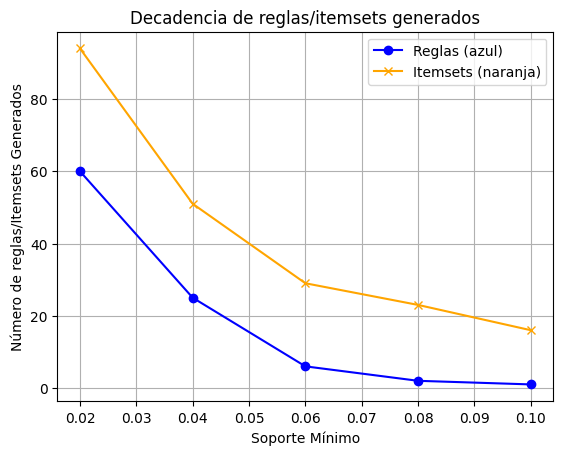

In [82]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

soportes_minimos = [0.02, 0.04, 0.06, 0.08, 0.10]
numero_itemsets = []
reglas_generadas = []
numero_reglas = []

# Vamos a iterar sobre los soportes mínimos y generar los itemsets frecuentes y reglas asociadas
# para evaluar cómo cambian con el soporte mínimo
for soporte in soportes_minimos:
    itemsets_frec = apriori(df, min_support=soporte, use_colnames=True)
    numero_itemsets.append(len(itemsets_frec))
    reglas = association_rules(itemsets_frec, metric="confidence", min_threshold=0.4)
    reglas_filtradas = reglas[reglas['confidence'] > 0.4]
    reglas_generadas.append({
        'soporte': soporte,
        'reglas': reglas_filtradas
    })
    numero_reglas.append(len(reglas))

# Graficamos los resultados para ver la comparación y la caída de número de itemsets
plt.plot(soportes_minimos, numero_reglas, marker='o', label='Reglas (azul)', color='blue')
plt.plot(soportes_minimos, numero_itemsets, marker='x', label='Itemsets (naranja)', color='orange')
plt.title('Decadencia de reglas/itemsets generados')
plt.xlabel('Soporte Mínimo')
plt.ylabel('Número de reglas/Itemsets Generados')
plt.legend()
plt.grid(True)
plt.show()


##### Interpretación del Grafo
Para dar contexto, ya sabemos de antemano que la Leche es el 1-itemset más frecuente de todo el dataset, y que la Carne es de los menos frecuentes.

Imaginemos que estamos evaluando el soporte mínimo más bajo del rango (0.02), veamos una de las reglas que se generan:

In [83]:
# Mostramos una de las muchas reglas que se generaron en el soporte minimo 0.02.
print('Regla Pan->Leche:\n', reglas_generadas[0]['reglas'].iloc[14])

Regla Pan->Leche:
 antecedents              (Pan)
consequents            (Leche)
antecedent support    0.085714
consequent support    0.457143
support               0.042857
confidence                 0.5
lift                   1.09375
representativity           1.0
leverage              0.003673
conviction            1.085714
zhangs_metric          0.09375
jaccard               0.085714
certainty             0.078947
kulczynski            0.296875
Name: 19, dtype: object


El pan es un producto que tiene un soporte muy bajo en el dataset original, ya que solamente aparece en el 8% de las transacciones totales. Sin embargo, la leche aparece en el 46% de ellas. Como el soporte mínimo es bajo, es muy probable que se generen reglas que relacionen productos poco frecuentes con productos poco frecuentes.

Es por esta razón por la que aparece la regla de $Pan->Leche$

Sin embargo, mostremos las reglas del soporte mínimo más alto (0.1) y veamos las diferentes reglas que se generaron:

In [84]:
for index, regla in reglas_generadas[4]['reglas'].iterrows():
    antecedente = ', '.join(list(regla['antecedents']))  # Convertimos frozenset a lista y luego a string
    consecuente = ', '.join(list(regla['consequents']))
    print(f"Regla {index}: {antecedente} -> {consecuente}")
    print(f"Confianza: {100*regla['confidence']:.2f}% Lift: {regla['lift']:.5f}")

Regla 0: Galletas -> Leche
Confianza: 46.67% Lift: 1.02083


Como se puede apreciar, sólo se generó una regla. Los productos que aparecen son los más frecuentes de todo el dataset, y no se trata de una casualidad (Aparecen Galletas  y Leche en el 21 y 46% de las transacciones). 

El algoritmo a priori tiende a relacionar a aquellos productos que son más frecuentes, y es por ello por lo que los productos menos frecuentes no van a ser asociados a los más frecuentes si el soporte mínimo no es relativamente bajo.

En conclusión, podemos afirmar que a medida que vamos aumentando el soporte mínimo, va decrementando el número de reglas obtenidas, ya que se harán cada vez más específicas y dejará de generalizar tanto.

Sin embargo, esta relación no nos dice nada novedoso ni útil, porque se podría inferir de los itemsets_frecuentes que si estos dos productos son los más frecuentes, será porque aparecen en la cesta de la compra de la mayoría de clientes. Por ello, es importante buscar un equilibrio para encontrar patrones desconocidos pero comprensibles para el ojo humano.

#### Confianza
La confianza determina el porcentaje de éxito de las reglas generadas contrastadas con el dataset original. Para jugar con la confianza, se ha optado por unas un soporte mínimo de 0.03, ya que con el umbral que pide el enunciado (0.3) no se genera ninguna regla.

##### Confianza en 20%
Con un soporte mínimo de 0.03, vemos como la cantidad de reglas generadas con una confianza de un 20% es grande. Fijándonos en la métrica Lift, podemos ver como en la mayoría de ellas el antecedente está positivamente correlado con el consecuente.

In [85]:
soporte = 0.03

itemsets_frecuentes = apriori(df, min_support = soporte, use_colnames=True)
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.2)
reglas[(reglas['confidence'] > 0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Aceite de oliva),(Leche),0.114286,0.457143,0.057143,0.500000,1.093750,1.0,0.004898,1.085714,0.096774,0.111111,0.078947,0.312500
1,(Aceite de oliva),(Patatas),0.114286,0.100000,0.042857,0.375000,3.750000,1.0,0.031429,1.440000,0.827957,0.250000,0.305556,0.401786
2,(Patatas),(Aceite de oliva),0.100000,0.114286,0.042857,0.428571,3.750000,1.0,0.031429,1.550000,0.814815,0.250000,0.354839,0.401786
3,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
4,(Cebollas),(Arroz),0.128571,0.085714,0.057143,0.444444,5.185185,1.0,0.046122,1.645714,0.926230,0.363636,0.392361,0.555556
5,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
6,(Azúcar),(Leche),0.142857,0.457143,0.057143,0.400000,0.875000,1.0,-0.008163,0.904762,-0.142857,0.105263,-0.105263,0.262500
7,(Azúcar),(Té),0.142857,0.157143,0.042857,0.300000,1.909091,1.0,0.020408,1.204082,0.555556,0.166667,0.169492,0.286364
8,(Té),(Azúcar),0.157143,0.142857,0.042857,0.272727,1.909091,1.0,0.020408,1.178571,0.564972,0.166667,0.151515,0.286364
9,(Café),(Galletas),0.142857,0.214286,0.042857,0.300000,1.400000,1.0,0.012245,1.122449,0.333333,0.136364,0.109091,0.250000


##### Confianza en 60%
Con un soporte mínimo de 0.03, vemos como la cantidad de reglas generadas con una confianza de un 60% es imnesamente inferior. Es tarea dificil obtener reglas con un porcentaje de confianza muy elevado con un dataset de tales dimensiones, por lo que es lógico que al incrementar la confianza se decremente el número de reglas aptas.

In [86]:
itemsets_frecuentes = apriori(df, min_support = soporte, use_colnames=True)
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.6)
reglas[(reglas['confidence'] > 0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Arroz),(Cebollas),0.085714,0.128571,0.057143,0.666667,5.185185,1.0,0.046122,2.614286,0.882812,0.363636,0.617486,0.555556
1,(Arroz),(Leche),0.085714,0.457143,0.057143,0.666667,1.458333,1.0,0.017959,1.628571,0.343750,0.117647,0.385965,0.395833
2,(Tomates),(Yogur),0.071429,0.142857,0.042857,0.600000,4.200000,1.0,0.032653,2.142857,0.820513,0.250000,0.533333,0.450000


##### Interpretar la regla más significativa
La regla que más nos llama la atención es la de: $Arroz -> Leche$

Es una regla que no nos descubre un mundo nuevo, pero nos sirve para ver que el modelo está logrando asociaciones lógicas, ya que el arroz con leche se hace con arroz y con leche, y la gente que compra uno es más propensa a comprar lo otro probablemente para hacer dicho postre.

Esta regla aparece tanto en las reglas con un 20% de confianza como en las del 60%, lo que nos reafirma en la teoría de que ambos productos tienden a comprarse a la vez.

Además su índice de Lift, mayor que 1, nos indica que están correlados positivamente.


#### Búsqueda de la mejor configuración de soporte y confianza mínima
El principal objetivo en el que nos centraremos será encontrar el equilibrio entre un soporte bajo y una confianza alta, sin llegar a los extremos. Un soporte bajo nos proporcionará suficientes patrones de compra, sin llegar a ser demasiado generales (k=2 y k=3). En cuanto a la confianza, buscamos una que sea alta, para que no nos proporcione reglas "inservibles" de poca confianza, pero que tampoco sea excesiva, ya que nos daría reglas poco interesantes y demasiado específicas.

Elaboraremos un sistema de puntuación para escoger que combinación de parámetros serán los que produzcan reglas de mayor calidad. Para ello, usaremos dos métricas: el promedio de lift de todas las reglas generadas por cada configuración, y el número de reglas que se crean.

El promedio de Lift nos dirá si nuestras reglas asocian antecedentes y consecuentes de manera positiva, negativa u aleatoria. En el caso de hacerlo de manera aleatoria o negativa, nuestra configuración no habrá producido reglas útiles.  

Combinaremos esta métrica con el número de reglas generadas, para que no puntúen bien aquellas configuraciones que, aunque tengan buen promedio de lift, generen pocas o demasiadas reglas.

Nuestro sistema de puntuación funcionará de la siguiente manera: $$score = 0.6*liftPromedio + 0.4*numReglasPenalizadas$$
##### $LIFT$
Lift es una métrica de análisis de reglas que mide la fuerza de relación entre dos items de una regla. Te dice si la aparición de un ítem de tu "carrito" tiene más probabilidades de estar relacionada con otro ítem de lo que esperarías si estos fueran independientes.
$$\text{Lift}(A \to B) = \frac{P(A \cap B)}{P(A) \cdot P(B)}$$
Donde:
- $P(A \cap B)$  es la probabilidad de que tanto $A$ como $B$ ocurran juntos (la **frecuencia conjunta** de los ítems $A$ y $B$).
- $P(A)$ es la probabilidad de que $A$ ocurra.
- $P(B)$ es la probabilidad de que $B$ ocurra.

##### Interpretación del Lift

- $Lift = 1$: Si el Lift es igual a 1, significa que los ítems $A$ y $B$ ocurren de manera **independiente**. La presencia de $A$ no influye en la presencia de $B$, y viceversa.
- $Lift > 1$: Si el Lift es mayor que 1, significa que los ítems $A$ y $B$ tienen una **relación positiva**. Es decir, cuando el cliente compra $A$, es más probable que compre $B$ también. Cuanto mayor sea el Lift, más fuerte es esta relación.
- $Lift < 1$: Si el Lift es menor que 1, significa que los ítems $A$ y $B$ tienen una **relación negativa**. Es decir, si un cliente compra $A$, es menos probable que compre $B$, y viceversa.


In [87]:
soportes = [0.02, 0.04, 0.05, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16]
confianzas = [0.40, 0.50, 0.6, 0.7]

# Este será el rango de reglas ideales, ni muy pocas, ni demasiadas
REGLAS_IDEAL_MIN = 15
REGLAS_IDEAL_MAX = 50

def evaluar_configuracion(df, soporte_min, confianza):
    """Ejecuta el algoritmo A Priori y busca las reglas de asociación dado un dataset, un soporte mínimo y una confianza mínima

    Args:
        df (pd.DataFrame): DataFrame de transacciones
        soporte_min: soporte mínimo a modo de umbral para los itemsets frecuentes
        confianza: confianza mínimo a modo de umbral para las reglas


    Returns:
        len(reglas): cantidad de reglas generadas
        lift_promedio: Recoge la media de los lift de las reglas generadas
        reglas: Devuelve las reglas con sus datos y métricas de calidad
    """
    itemsets_f = apriori(df, min_support=soporte_min, use_colnames=True)
    if len(itemsets_f) > 0:
        reglas = association_rules(itemsets_f, metric="confidence", min_threshold=confianza)
        lift_promedio = reglas['lift'].mean() if len(reglas) > 0 else 1
    else:
        return 0, 1, None

    return len(reglas), lift_promedio, reglas


def normalizar(valores):
    """Función para normalizar una lista de valores entre 0 y 1

    Args:
        valores: Lista de valores a normalizar

    Returns:
        Lista de valores normalizados entre 0 y 1
    """

    min_val = min(valores)
    max_val = max(valores)
    return [(v - min_val) / (max_val - min_val) if max_val > min_val else 0 for v in valores]


def puntuar_configuracion(resultados, lifts_norm):
    """Puntúa la configuración basándose en el lift normalizado, y el número de reglas penalizado

    Args:
        resultados: Resultados obtenidos por las configuraciones a puntuar (soporte, confianza, lift promedio, num_reglas y reglas)
        lift_norm: contiene los lift de cada regla pero normalizados entre 0 y 1

    Returns:
        mejor_result: se trata de la configuración con la mejor puntuación entre 0 y 1.
    """
    puntuaciones = []

    # La puntuación se llevará a cabo mediante una campana de Gauss, que penalizará la
    # configuración si el número de reglas es inferior/superior a los limites establecidos
    for i, result in enumerate(resultados):
        exceso =  max(0, REGLAS_IDEAL_MIN - result['Número de reglas'], result['Número de reglas'] - REGLAS_IDEAL_MAX)
        reglas_penalizadas = np.exp(- (exceso / (REGLAS_IDEAL_MAX - REGLAS_IDEAL_MIN)) ** 2)
        puntuacion = 0.4 * lifts_norm[i] + 0.6 * reglas_penalizadas
        puntuaciones.append(puntuacion)
    mejor_result = resultados[np.argmax(puntuaciones)]

    mejor_result['Puntuación'] = max(puntuaciones) * 100
    return mejor_result


def mejor_configuracion(soportes, confianzas, df):
    """Busca la mejor combinación de parámetros puntuando cada configuración.

    Args:
        soportes: Rango de soportes mínimos candidatos.
        confianzas: Rango de confianzas mínimas candidatas.
        df (pd.DataFrame): DataFrame con los datos de las transacciones.

    Returns:
        mejor_resultado: Contiene los resultados obtenidos por la mejor configuración para este dataset.
    """
    resultados = []


    for soporte in soportes:
        for confianza in confianzas:

            # Evaluamos configuración a configuración buscando la que más puntuación genere
            num_reglas, lift_promedio, reglas = evaluar_configuracion(df, soporte, confianza)

            resultados.append({
                "Soporte": soporte,
                "Confianza": confianza,
                "Número de reglas": num_reglas,
                "Lift promedio": lift_promedio,
                "Reglas": reglas
            })

    lifts_norm = normalizar([r["Lift promedio"] for r in resultados])

    mejor_resultado = puntuar_configuracion(resultados, lifts_norm)

    print("\nMejor configuración basada en Lift promedio:")
    print(f"Soporte:     {mejor_resultado['Soporte']:.2f}")
    print(f"Confianza:   {mejor_resultado['Confianza']:.2f}")
    print(f"Número de reglas: {mejor_resultado['Número de reglas']}")
    print(f"Lift promedio:   {mejor_resultado['Lift promedio']:.4f}")
    print(f"Puntuación:   {mejor_resultado['Puntuación']:.4f}")

    if mejor_resultado['Reglas'] is not None and len(mejor_resultado['Reglas']) > 0:
        print("\n\n\nReglas resultantes:")

        for index, regla in mejor_resultado['Reglas'].iterrows():
            antecedente = ', '.join(list(regla['antecedents']))  # Convertimos frozenset a lista y luego a string
            consecuente = ', '.join(list(regla['consequents']))
            print(f"Regla {index}: {antecedente} -> {consecuente}")
            print(f"Confianza: {100*regla['confidence']:.2f}%, Lift: {regla['lift']:.5f}\n")
    else:
        print("No se generaron reglas para la mejor configuración.")

    return mejor_resultado

mejor_resultado = mejor_configuracion(soportes, confianzas, df)


Mejor configuración basada en Lift promedio:
Soporte:     0.02
Confianza:   0.70
Número de reglas: 8
Lift promedio:   7.5434
Puntuación:   97.6474



Reglas resultantes:
Regla 0: Aceite de oliva, Carne -> Patatas
Confianza: 100.00%, Lift: 10.00000

Regla 1: Patatas, Carne -> Aceite de oliva
Confianza: 100.00%, Lift: 8.75000

Regla 2: Aceite de oliva, Jabón -> Leche
Confianza: 100.00%, Lift: 2.18750

Regla 3: Aceite de oliva, Manzanas -> Patatas
Confianza: 100.00%, Lift: 10.00000

Regla 4: Arroz, Café -> Leche
Confianza: 100.00%, Lift: 2.18750

Regla 5: Arroz, Pasta -> Cebollas
Confianza: 100.00%, Lift: 7.77778

Regla 6: Pasta, Cebollas -> Arroz
Confianza: 100.00%, Lift: 11.66667

Regla 7: Carne, Leche -> Zanahorias
Confianza: 100.00%, Lift: 7.77778



Vemos como las reglas 0 y 1 repiten items en orden distinto (Aceite de oliva, Patatas, Carne), lo que sugiere que estos tres productos tienden a aparecer juntos en las transacciones. Para más inri, tenemos que estas reglas son del 100% de confianza, y como ya hemos visto que el lift promedio es muy positivo, todo parece indicar que estas reglas son de muy alta calidad.

También aparecen las reglas 5 y 6, en los que se repiten items como el Arroz, la Cebolla y la Pasta. Al igual que en el caso anterior, estos tres items tenderán a aparecer juntos en los tickets de la compra.

##### Interpretación del LIFT en la mejor configuración
Como ya se explicó, nos hemos basado en el lift promedio para calcular la mejor configuración. Analicemos las reglas 10 y 23 por ejemplo, y sus lift, para ver que concluimos de dichas reglas:

In [88]:
for index, regla in mejor_resultado['Reglas'].iterrows():
    if index == 2 or index == 7:
        # El antecedente y consecuente están en formato "frozenset", por lo que, para mejorar la presentación, cambiamos el tipo de dato
        antecedente = ', '.join(list(regla['antecedents']))  # Convertimos frozenset a lista y luego a string
        consecuente = ', '.join(list(regla['consequents']))
        print(f"Regla {index}: {antecedente} -> {consecuente}")
        print(f"Confianza: {100*regla['confidence']:.2f}% Lift: {regla['lift']:.5f}\n")

Regla 2: Aceite de oliva, Jabón -> Leche
Confianza: 100.00% Lift: 2.18750

Regla 7: Carne, Leche -> Zanahorias
Confianza: 100.00% Lift: 7.77778



##### $\text{Regla 2}$
La regla 2 posee un lift elevado, mayor que 2, lo que sugiere una fuerza importante de relación entre el hecho de que si un cliente compra Jabón y Aceite de oliva, comprará Leche con mucha probabilidad.
Además, la confianza es del 100%, lo que da más veracidad a la regla generada.

##### $\text{Regla 7}$
Por otro lado, la regla 7 muestra un Lift de 7.77, lo que nos sugiere que la relacion entre Leche,Carne y Zanahorias será extremadamente fuerte, y estarán correlados positivamente al estar muy lejano al valor 1, que indicaría aleatoriedad e independencia entre los itemsets.
Además, la confianza es del 100%, lo que da más veracidad a la regla generada.


#### Consecuencias de eliminar del dataset Productos Críticos
Los productos críticos son aquellos que:
  - Aparecen con **mayor frecuencia**
  - Alto impacto en las **reglas generadas**.
  - Clave en la generación de **asociaciones**.

Para ello, simplemente nos basaremos en el soporte de cada item individual. Como esto ya lo hicimos anteriormente, sabemos que el item más frecuente es el de la $Leche$. Veamos que impacto tiene eliminar algunas instancias de $Leche$ del dataset original. Dejaremos 5 instancias de Leche, para ver las consecuencias que tiene reducir su frecuencia de soporte.

In [89]:
df = df_original.copy()
instancias_leche = df.apply(lambda x: 'Leche' in x)
print(f"Instancias de 'Leche' antes de eliminar instancias: {instancias_leche.sum()}")

# Eliminaremos todas las instancias dejando 5 únicamente.
while instancias_leche.sum() > 5:
    indice_con_leche = df[instancias_leche].index[0]
    # En aquellas transacciones donde haya Leche, se reemplaza por la misma transacción sin el producto Leche.
    df.at[indice_con_leche] = [producto for producto in df.at[indice_con_leche] if producto != 'Leche']
    #Comprobamos que se hayan eliminado las instancias justas
    instancias_leche  = df.apply(lambda x: 'Leche' in x)

print(f"Instancias de 'Leche' después de eliminar instancias: {instancias_leche.sum()}")

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)

# Convertimos a formato A Priori usando el Transaction Dncoder
df_instancias = pd.DataFrame(te_ary, columns=te.columns_)

Instancias de 'Leche' antes de eliminar instancias: 32
Instancias de 'Leche' después de eliminar instancias: 5


Una vez hemos eliminado las suficientes instancias de $Leche$, busquemos la mejor configuracion para este dataset

In [90]:
mejor_result = mejor_configuracion(soportes, confianzas, df_instancias)


Mejor configuración basada en Lift promedio:
Soporte:     0.02
Confianza:   0.70
Número de reglas: 5
Lift promedio:   9.6389
Puntuación:   95.2966



Reglas resultantes:
Regla 0: Aceite de oliva, Carne -> Patatas
Confianza: 100.00%, Lift: 10.00000

Regla 1: Patatas, Carne -> Aceite de oliva
Confianza: 100.00%, Lift: 8.75000

Regla 2: Aceite de oliva, Manzanas -> Patatas
Confianza: 100.00%, Lift: 10.00000

Regla 3: Arroz, Pasta -> Cebollas
Confianza: 100.00%, Lift: 7.77778

Regla 4: Pasta, Cebollas -> Arroz
Confianza: 100.00%, Lift: 11.66667



##### Interpretación tras eliminar instancias de $Leche$
Viendo los resultados, cabe destacar que las reglas se han reducido usando la misma configuración que con el dataset original (da la casualidad que es la mejor combinación para este dataset sin Leche). Esto se puede deber principalmente a que, al eliminar tantas instancias de un producto crítico como la leche, muchas de las combinaciones que antes sucedían se han roto.

Sin embargo, podemos apreciar como el Lift Promedio ha subido en un 25%, lo que indica que las relaciones que hemos encontrado son aún más fuertes que antes.

#### Consecuencias de eliminar transacciones completas con instancias de Productos Críticos

In [91]:
df = df_original.copy()
instancias_leche = df.apply(lambda x: 'Leche' in x)
print(f"Transacciones con 'Leche' antes de eliminar filas: {instancias_leche.sum()}")

transacciones_con_leche = df.apply(lambda x: 'Leche' in x)
indices_transac_leche = df[transacciones_con_leche].index
indices_a_eliminar = indices_transac_leche[2:]  # eliminamos las transacciones a partir de la quinta

df = df.drop(indices_a_eliminar).reset_index(drop=True)
print(f"Transaccions con 'Leche' despues de eliminar filas: {df.apply(lambda x: 'Leche' in x).sum()}")

te = TransactionEncoder()
te_ary = te.fit(df).transform(df)

# Convertimos a formato A Priori
df_transac = pd.DataFrame(te_ary, columns=te.columns_)

Transacciones con 'Leche' antes de eliminar filas: 32
Transaccions con 'Leche' despues de eliminar filas: 2


Siguiendo las indicaciones del enunciado de usar el mismo soporte y confianza que con la mejor configuracion del dataset incial, nos sale una cantidad ingente de reglas (765). Lo que mas nos asombra es que el Lift es exageradamente grande, cuadriplicando el lift promedio que obtuvimos en el dataset original. 

Al haber reducido tan drásticamente los registros del dataset, nos encontramos también que al usar el mismo soporte mínimo de antes existen 331 itemsets frecuentes, lo cual multiplica por mucho los itemsets-frecuentes que encontrabamos en el dataset original. Esta puede ser la razón de más peso del porqué se generan tantas reglas con una confianza que no es del todo baja (60%).

Cabe mencionar que el Lift es increíblemente alto, llegando casi a 20, lo que indice que la mayoría de las reglas están muy fuertemente relacionadas.

In [92]:
itemsets_frec = apriori(df_transac, min_support=0.02, use_colnames=True)
reglas = association_rules(itemsets_frec, metric="confidence", min_threshold=0.7)

print(f"Número de reglas generadas: {len(reglas)}")

Número de reglas generadas: 765


Sin embargo, si buscamos la mejor configuración según mi sistema de puntuación, usando un soporte mayor, se reduce drásticamente el número de reglas, elimnando aquellas que eran demasiado especificas en el caso anterior. 

De esta manera, conseguimos que el dataset produzca reglas comprensibles para el humano y para su interpretación.

In [93]:
mejor_result = mejor_configuracion(soportes, confianzas, df_transac)


Mejor configuración basada en Lift promedio:
Soporte:     0.04
Confianza:   0.60
Número de reglas: 17
Lift promedio:   7.7108
Puntuación:   74.6935



Reglas resultantes:
Regla 0: Aceite de oliva -> Patatas
Confianza: 75.00%, Lift: 6.00000

Regla 1: Patatas -> Aceite de oliva
Confianza: 60.00%, Lift: 6.00000

Regla 2: Arroz -> Cebollas
Confianza: 100.00%, Lift: 8.00000

Regla 3: Cebollas -> Arroz
Confianza: 60.00%, Lift: 8.00000

Regla 4: Arroz -> Pasta
Confianza: 66.67%, Lift: 6.66667

Regla 5: Carne -> Galletas
Confianza: 75.00%, Lift: 3.75000

Regla 6: Tomates -> Yogur
Confianza: 75.00%, Lift: 3.33333

Regla 7: Aceite de oliva, Patatas -> Carne
Confianza: 66.67%, Lift: 6.66667

Regla 8: Aceite de oliva, Carne -> Patatas
Confianza: 100.00%, Lift: 8.00000

Regla 9: Patatas, Carne -> Aceite de oliva
Confianza: 100.00%, Lift: 10.00000

Regla 10: Aceite de oliva, Patatas -> Manzanas
Confianza: 66.67%, Lift: 5.33333

Regla 11: Aceite de oliva, Manzanas -> Patatas
Confianza: 100.00%, Lift